In [1]:
import pandas as pd
from pathlib import Path
import matplotlib as plt
import numpy as np
import sqlalchemy
import yfinance as yf
import yahoo_fin.stock_info as si
import os
import panel as pn


In [2]:
# Using the Pandas read_csv funcion and the Path module, 
# read "sp500_sustainability_scores.csv" file into a Pandas DataFrame
esg_df = pd.read_csv(
    Path("sp500_sustainability_scores.csv")
)

# Review the DataFrame
esg_df.head()

,Unnamed: 0,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,...,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract,company_ticker
0,Value,False,False,False,8.65,False,False,False,False,True,...,False,False,False,10.48,Pharmaceuticals,False,0.34,0,False,A
1,Value,False,False,False,12.31,False,False,False,False,False,...,False,False,False,58.47,Transportation,False,11.53,0,False,AAL
2,Value,False,False,False,9.17,False,False,False,False,False,...,False,False,False,5.74,Retailing,False,0.10,0,False,AAP
3,Value,False,False,False,6.86,False,False,False,False,False,...,False,False,False,12.87,Technology Hardware,False,0.65,0,False,AAPL
4,Value,False,False,False,16.92,False,False,False,False,True,...,False,False,False,53.78,Pharmaceuticals,False,1.12,0,False,ABBV


In [3]:
# Create the connection string for your SQLite database
database_connection_string = 'sqlite:///'

# Pass the connection string to the SQLAlchemy create_engine function
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that the database engine was created.
engine

Engine(sqlite:///)

In [4]:
esg_df.to_sql(
    'esg_score_info', #New table name
    engine, 
    index=False, 
    if_exists='replace'
)

# Confirm that the table was created by calling the table_names function
engine.table_names()

/Users/puntepbhayakaporn/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  if __name__ == '__main__':


['esg_score_info']

In [5]:
# e_score = 10
# s_score = 10
# g_score = 8

# Create and execute a query to return all columns for the 10 highest credit scores.
# query1 = """
# SELECT company_ticker, environmentScore, socialScore, governanceScore
# FROM esg_score_info
# WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
# """

## , environmentScore, socialScore, governanceScore

# Call on the database engine to execute the query
# results = engine.execute(query1)

# List of the results of the database query
# list(results)

# Choose the filter for each category of ESG

In [6]:
pn.extension()

In [7]:
# Create sliders for each category of ESG
e_score_slider = pn.widgets.IntSlider(name='Integer Slider', start=0, end=20, step=1, value=10)
s_score_slider = pn.widgets.IntSlider(name='Integer Slider', start=0, end=20, step=1, value=10)
g_score_slider = pn.widgets.IntSlider(name='Integer Slider', start=0, end=20, step=1, value=10)

**Please adjust the slider for** *environmental* **score**

In [19]:
e_score_slider

IntSlider(end=20, name='Integer Slider', value=5)

**Please adjust the slider for** *social* **score**

In [20]:
s_score_slider

IntSlider(end=20, name='Integer Slider', value=10)

**Please adjust the slider for** *governance* **score**

In [21]:
g_score_slider

IntSlider(end=20, name='Integer Slider', value=10)

# Create a custom index for FILTERED stock in the S&P500

In [22]:
e_score = e_score_slider.value
s_score = s_score_slider.value
g_score = g_score_slider.value

# Create and execute a query to return esg data for tickers that match the chosen criteria.
query1 = """
SELECT company_ticker, environmentScore, socialScore, governanceScore
FROM esg_score_info
WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
"""

# read in your SQL query results using pandas
esg_df = pd.read_sql(query1, con=engine)

# return your first five rows
esg_df.head()

,company_ticker,environmentScore,socialScore,governanceScore
0,A,0.34,8.65,6.34
1,AAP,0.10,9.17,3.70
2,AAPL,0.65,6.86,8.76
3,ABC,0.84,6.35,5.50
4,ACN,0.29,4.32,4.83


In [23]:
esg_ticker = esg_df['company_ticker']

#Download historical data for S&P 500
sp500_hist_data = yf.download(list(esg_ticker), start="2020-01-01", end="2020-04-30")

#Count the number of column fetched
column_count = (len(sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
sp500_hist_data_closing = sp500_hist_data.iloc[:,0:int(column_count)]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing

[*********************100%***********************]  145 of 145 completed


Adj Close                                                \
                    A         AAP       AAPL        ABC         ACN   
Date                                                                  
2020-01-02  84.799675  155.478271  74.207466  82.064140  203.776108   
2020-01-03  83.438141  155.488022  73.486023  81.032082  203.436722   
2020-01-06  83.684799  152.932632  74.071579  82.218468  202.108276   
2020-01-07  83.941315  151.118530  73.723213  81.630096  197.744766   
2020-01-08  84.770073  149.382446  74.909149  82.421021  198.132614   
...               ...         ...        ...        ...         ...   
2020-04-24  74.926376  115.013756  70.079315  85.932640  171.566696   
2020-04-27  75.420952  116.343956  70.128853  87.947754  175.448563   
2020-04-28  74.629646  118.319695  68.992119  86.736748  174.402344   
2020-04-29  77.864090  122.173378  71.258163  86.552658  183.398178   
2020-04-30        NaN         NaN        NaN        NaN         NaN   

                                                                      ...  \
                  ADBE         ADP        ADSK        AFL       AMAT  ...   
Date                                                                  ...   
2020-01-02  334.429993  164.650070  187.830002  50.339603  61.148903  ...   
2020-01-03  331.809998  164.302048  184.949997  49.990490  60.175625  ...   
2020-01-06  333.709991  164.524399  187.119995  49.848957  58.877934  ...   
2020-01-07  333.390015  162.532974  187.500000  49.377167  60.578697  ...   
2020-01-08  337.869995  164.060379  189.949997  49.528145  60.539379  ...   
...                ...         ...         ...        ...        ...  ...   
2020-04-24  344.100006  135.427689  180.350006  34.424786  51.025948  ...   
2020-04-27  348.500000  138.336029  182.509995  35.354408  50.325748  ...   
2020-04-28  333.450012  139.104446  177.309998  35.847687  49.724167  ...   
2020-04-29  349.170013  141.857162  187.899994  37.175728  53.590069  ...   
2020-04-30         NaN         NaN         NaN        NaN        NaN  ...   

                                                                     \
                  ULTA           V        VFC        VNO        VTR   
Date                                                                  
2020-01-02  254.550003  188.484451  95.142197  57.979538  51.381226   
2020-01-03  250.169998  186.985413  94.544182  58.430981  52.000820   
2020-01-06  250.949997  186.581070  94.173981  59.192238  52.538410   
2020-01-07  253.089996  186.087967  93.708855  58.475239  52.101051   
2020-01-08  258.000000  189.273422  92.114120  58.351303  51.845932   
...                ...         ...        ...        ...        ...   
2020-04-24  210.520004  165.251648  52.156944  33.758133  25.963844   
2020-04-27  208.089996  169.636765  55.158089  35.831703  26.685324   
2020-04-28  218.679993  169.133057  56.868942  37.145565  27.322474   
2020-04-29  226.160004  179.542755  57.614449  39.585583  30.601921   
2020-04-30         NaN         NaN        NaN        NaN        NaN   

                                                                    
                   VZ        WDC       WELL        XYL         ZTS  
Date                                                                
2020-01-02  55.290840  64.771545  74.092934  77.805450  132.432312  
2020-01-03  54.702168  63.774597  75.396530  78.263412  132.452087  
2020-01-06  54.584423  62.550629  76.542976  77.756737  131.435165  
2020-01-07  53.977627  66.785164  76.043716  77.464417  131.879471  
2020-01-08  54.077255  67.752487  76.062210  77.727501  131.593155  
...               ...        ...        ...        ...         ...  
2020-04-24  53.581291  40.689999  41.142052  66.972038  124.688225  
2020-04-27  53.470295  43.090000  42.897537  69.171204  126.183578  
2020-04-28  53.488796  44.700001  45.810913  71.800430  121.806480  
2020-04-29  53.757030  47.730000  49.060448  72.122993  124.331734  
2020-04-30        NaN        NaN        NaN   

In [24]:
#Create the "Custom_Index" column to calculate the average price of all the filtered stock
sp500_hist_data_closing['custom_index'] = sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
position_of_avg_price = len(sp500_hist_data_closing.columns)

#Select only date and price
sp500_hist_data_closing_only = sp500_hist_data_closing.iloc[:,int(position_of_avg_price)-1]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing_only

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_filtered_sp500 = sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
sp500_hist_data_closing_only = (sp500_hist_data_closing_only/division_factor_filtered_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03     99.488480
2020-01-06     99.605244
2020-01-07     99.255885
2020-01-08     99.934591
Name: (custom_index, ), dtype: float64

# Compute the index for ALL stocks in the S&P500

In [25]:
# Fetch the data for ALL S&P 500 as an index for comparison

# Create and execute a query to return the list of tickers for S&P 500
query_all_sp500 = """
SELECT company_ticker
FROM esg_score_info
"""

# read in your SQL query results using pandas
all_sp500_df = pd.read_sql(query_all_sp500, con=engine)
all_sp500_ticker = all_sp500_df['company_ticker']

#Download historical data for S&P 500
all_sp500_hist_data = yf.download(list(all_sp500_ticker), start="2020-01-01", end="2020-04-30")


[*********************100%***********************]  446 of 446 completed


In [26]:
#Count the number of column fetched
all_sp500_column_count = (len(all_sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
all_sp500_hist_data_closing = all_sp500_hist_data.iloc[:,0:int(all_sp500_column_count)]

#Print the data frame to make sure the data is fetched correctly
all_sp500_hist_data_closing.head()


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799675  28.982893  155.478271  74.207466  80.137360  82.064140   
2020-01-03  83.438141  27.548195  155.488022  73.486023  79.376686  81.032082   
2020-01-06  83.684799  27.219410  152.932632  74.071579  80.003105  82.218468   
2020-01-07  83.941315  27.119778  151.118530  73.723213  79.546715  81.630096   
2020-01-08  84.770073  27.737495  149.382446  74.909149  80.110481  82.421021   

                                                           ...              \
                  ABT         ACN        ADBE         ADI  ...         WTW   
Date                                                       ...               
2020-01-02  84.001160  203.776108  334.429993  116.998917  ...  204.279999   
2020-01-03  82.977119  203.436722  331.809998  114.939316  ...  204.330002   
2020-01-06  83.411850  202.108276  333.709991  113.588921  ...  204.580002   
2020-01-07  82.948128  197.744766  333.390015  116.173134  ...  204.160004   
2020-01-08  83.286255  198.132614  337.869995  117.222366  ...  204.389999   

                                                                               \
                   WY        WYNN        XEL        XOM       XRAY        XYL   
Date                                                                            
2020-01-02  26.965097  142.405029  59.934875  61.174892  56.203197  77.805450   
2020-01-03  27.010973  140.292755  60.223114  60.683083  55.581242  78.263412   
2020-01-06  26.955925  140.015091  60.136642  61.149014  55.887280  77.756737   
2020-01-07  26.781601  140.679504  60.011738  60.648575  56.183449  77.464417   
2020-01-08  26.882526  141.562103  59.954086  59.733971  56.775787  77.727501   

                                               
                  YUM         ZBH         ZTS  
Date                                           
2020-01-02  98.132988  147.066025  132.432312  
2020-01-03  97.825630  146.681595  132.452087  
2020-01-06  97.768005  145.833878  131.435165  
2020-01-07  97.940903  145.705765  131.879471  
2020-01-08  98.113785  147.450424  131.593155  

[5 rows x 446 columns]

In [27]:
#Create the "Custom_Index" column to calculate the average price of ALL stock in S&P500
all_sp500_hist_data_closing['custom_index'] = all_sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
all_position_of_avg_price = len(all_sp500_hist_data_closing.columns)

#Select only date and price
all_sp500_hist_data_closing_only = all_sp500_hist_data_closing.iloc[:,int(all_position_of_avg_price)-1]

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_all_sp500 = all_sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
all_sp500_hist_data_closing_only = (all_sp500_hist_data_closing_only/division_factor_all_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
all_sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03     99.612947
2020-01-06     99.803996
2020-01-07     99.705085
2020-01-08    100.090191
Name: (custom_index, ), dtype: float64

# Combine the data to plot in a line graph


<AxesSubplot:title={'center':'The Price Index of Stock Filtered [E score = 5 ; S score = 10; G score = 10]'}, xlabel='Date', ylabel='Price Index'>

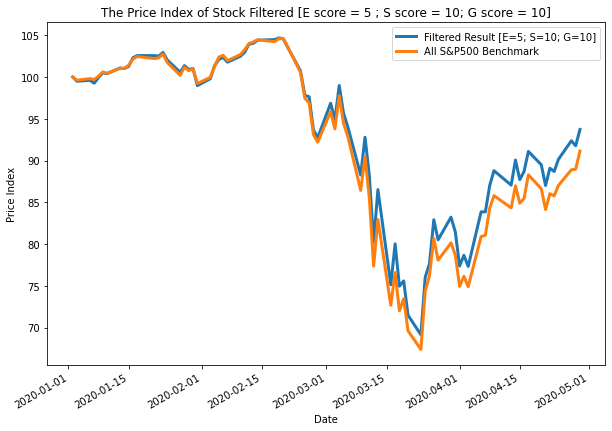

In [28]:
#Plot the filtered data frame
sp500_hist_data_closing_only.plot(
    title=f"The Price Index of Stock Filtered [E score >= {e_score} ; S score >= {s_score}; G score >= {g_score}]", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label=f"Filtered Result [E>={e_score}; S=>{s_score}; G=>{g_score}]",
    linewidth=3
)

#Plot the "ALL" S&P500 index data frame
all_sp500_hist_data_closing_only.plot(
    legend="top",
    label="All S&P500 Benchmark",
    linewidth=3
)

In [18]:
# To do
# -------
# table and column name for industry
# integrate the SQL code with streamlit